# Teddy MAG analysis

In [55]:
import pandas as pd
from glob import glob
import plotnine as pn
import os

from qiime2.plugins.deicode.actions import rpca
from biom import Table, load_table
import qiime2 as q2
from qiime2.plugins.qurro.actions import differential_plot
from qiime2.plugins.songbird.actions import multinomial 
from qiime2.plugins.songbird.actions import summarize_paired 

from skbio.stats.distance import permanova
from skbio import DistanceMatrix

from skbio.diversity import beta_diversity
%matplotlib inline

### Songbird differential abundance

In [57]:
from zipfile import ZipFile
def get_q2(file):
    """Given path to modela_fit.qzv, returns q2 score"""
    with ZipFile(file, 'r') as z:
        index_file=[x for x in z.namelist() if "index.html" in x][0]
        with z.open(index_file) as f:
            q2=f.readlines()[3].split()[-1].decode("utf-8") .replace("</p>",'')
            return(q2)

100%|██████████| 75000/75000 [00:32<00:00, 2286.24it/s]


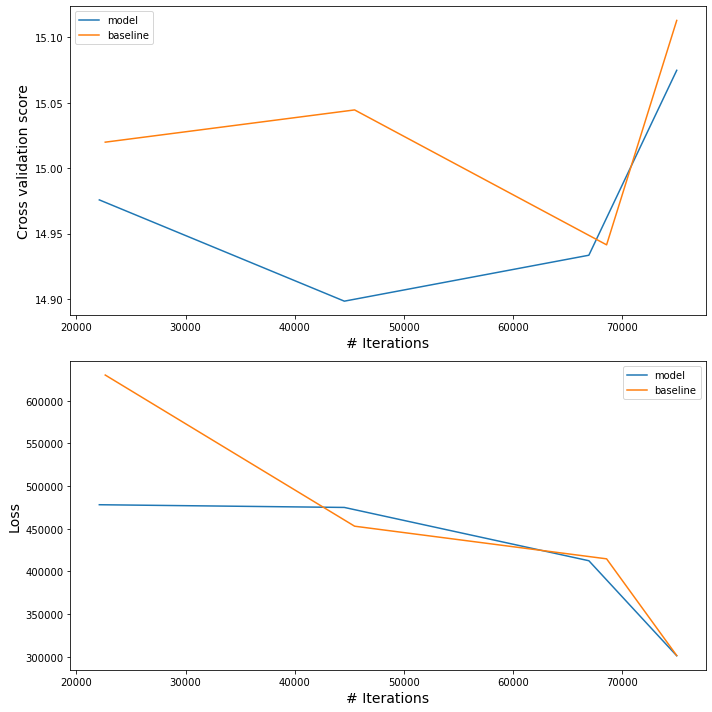

In [93]:
#Run/Import Songbird
folder="bin_quant_songbird"
!mkdir -p $folder

formula = "t1d"
songbird_dict = {}

#Run Songbird
(temp_differentials,
 temp_regression_stats,
 temp_regression_biplot) = multinomial(table=qza,
                                       metadata=q2_md,
                                       formula=formula,
                                      min_sample_count=0,
                                      min_feature_count=0)
#Run null model (just sex)
(null_differentials,
 null_regression_stats,
 null_regression_biplot) = multinomial(table=qza,
                                       metadata=q2_md,
                                       formula="1",
                                      min_sample_count=0,
                                      min_feature_count=0)
#Run qurro
#tmp_qurro = differential_plot(ranks= temp_differentials,
#                                table= qza,
#                                sample_metadata=q2_md).visualization
#Evaluate model fit
tmp_model_fit = summarize_paired(regression_stats = temp_regression_stats,
                                baseline_stats = null_regression_stats).visualization



#Add outputs to master dictionary
songbird_dict["differentials"] = temp_differentials
songbird_dict["regression_stats"] = temp_regression_stats
songbird_dict["regression_biplot"] = temp_regression_biplot
#songbird_dict["qurro"] = tmp_qurro
songbird_dict["model_fit"] = tmp_model_fit
#Save outputs
temp_differentials.save("{}/met_differentials.qza".format(folder))
temp_regression_stats.save("{}/met_regression_stats.qza".format(folder))
temp_regression_biplot.save("{}/met_regression_biplot.qza".format(folder))
#tmp_qurro.save("{}/met_qurro.qzv".format(folder))
tmp_model_fit.save("{}/met_model_fit.qzv".format(folder))

#Save q2 value
q2_value = get_q2("{}/met_model_fit.qzv".format(folder))
                                                    

In [94]:
q2_value

'0.002754'

In [96]:
#EC
diff_df = temp_differentials.view(pd.DataFrame)
diff_df.sort_values('t1d[T.yes]').tail(20)

,Intercept,t1d[T.yes]
featureid,,
Alistipes,2.258004,0.574075
Rothia,-1.007214,0.707253
Olsenella,3.678203,0.744587
Ammonifex,-2.110982,0.812577
Mobiluncus,0.489064,0.859955
butyrate_producing_bacterium,3.126925,0.924618
Ruminococcus,4.063830,0.998178
Erwinia,-2.336484,1.126312
Odoribacter,-0.311724,1.159114
